# IMDB Movie Reviews Sentiment Analysis

This notebook analyzes the IMDB movie reviews sentiment dataset. We'll load the data, explore it, and check the distribution of sentiments.

In [2]:
# Import required libraries
import pandas as pd

## Load the Dataset

Load the IMDB reviews CSV file into a pandas DataFrame. We assume the file has columns 'text' for the review content and 'label' for the sentiment (1 for positive, 0 for negative).

In [3]:
# Load the dataset
# Assuming the extracted CSV files are in the same directory as this notebook
# We'll load Train.csv for exploration
df = pd.read_csv('Train.csv')

# The columns are 'text' and 'label'
# Display a message confirming the load
print("Dataset loaded successfully.")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully.
Shape: (40000, 2)
Columns: ['text', 'label']


## Text Preprocessing

We'll clean the review text by removing missing values, normalizing text, removing stopwords, and applying lemmatization.

In [4]:
# Import necessary libraries for preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
# Define preprocessing function (improved to handle negation)
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Handle common contractions: don't/doesn't -> do not
    text = text.replace("n't", " not")

    # Remove quotes and some punctuation we don't need (keep word characters and spaces)
    text = re.sub(r"[\"'`,:;()\-]", " ", text)
    text = re.sub(r"[^\w\s]", "", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Define negation words to preserve
    negations = {"not", "no", "never", "none"}

    # Create a local stopword set that keeps negations
    local_stopwords = stop_words - negations

    words = text.split()

    # Simple negation handling: convert the word immediately following a negation into a NOT_<word> token
    processed_words = []
    i = 0
    while i < len(words):
        w = words[i]
        if w in negations and i + 1 < len(words):
            # keep the negation token (optional) and add a NOT_ prefixed token for the next word
            next_w = words[i + 1]
            # skip stopwords for the next word but still mark negation
            negated = "NOT_" + lemmatizer.lemmatize(next_w)
            processed_words.append(w)
            processed_words.append(negated)
            i += 2
        else:
            if w not in local_stopwords:
                processed_words.append(lemmatizer.lemmatize(w))
            i += 1

    return ' '.join(processed_words)

# Re-apply preprocessing to the dataframe
print("Re-applying improved preprocessing (keeps negations and marks negated words)...")
df['clean_text'] = df['text'].apply(preprocess_text)
print("Done. Sample:")
print(df['text'].iloc[0])
print(df['clean_text'].iloc[0])

Re-applying improved preprocessing (keeps negations and marks negated words)...
Done. Sample:
I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
grew b 1965 watching loving thu

In [9]:
# Show examples before and after preprocessing
print("Examples of text preprocessing:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df['text'].iloc[i][:100]}...")
    print(f"Cleaned: {df['clean_text'].iloc[i][:100]}...")

Examples of text preprocessing:

Example 1:
Original: I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ...
Cleaned: grew b 1965 watching loving thunderbird mate school watched played thunderbird school lunch school w...

Example 2:
Original: When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectat...
Cleaned: put movie dvd player sat coke chip expectation hoping movie would contain strongpoints first movie a...

Example 3:
Original: Why do people who do not know what a particular time in the past was like feel the need to try to de...
Cleaned: people know particular time past like feel need try define time others replace woodstock civil war a...


## Display First 10 Rows

Let's take a look at the first 10 rows of the dataset to understand its structure.

In [10]:
# Display the first 10 rows
df.head(10)

,text,label,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 1965 watching loving thunderbird mate s...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...
5,A terrible movie as everyone has said. What ma...,0,terrible movie everyone said made laugh cameo ...
6,Finally watched this shocking movie last night...,1,finally watched shocking movie last night dist...
7,I caught this film on AZN on cable. It sounded...,0,caught film azn cable sounded like would good ...
8,It may be the remake of 1987 Autumn's Tale aft...,1,may remake 1987 autumn tale eleven year direct...
9,My Super Ex Girlfriend turned out to be a plea...,1,super ex girlfriend turned pleasant surprise r...


## Print Basic Information

Get an overview of the dataset: number of rows, columns, and check for any missing values.

In [11]:
# Print basic information
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nNull values per column:")
print(df.isnull().sum())

Number of rows: 40000
Number of columns: 3

Null values per column:
text          0
label         0
clean_text    0
dtype: int64


## Print Label Value Counts

Check the distribution of sentiments in the dataset: how many positive (1) vs negative (0) reviews.

In [12]:
# Print value counts of the label column
print("Label distribution:")
print(df['label'].value_counts())

Label distribution:
label
0    20019
1    19981
Name: count, dtype: int64


## Train/Test Split

Split the cleaned dataset into training and test sets for model evaluation.

In [6]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# The labels are already encoded as 0/1 integers
# Prepare features and labels
X = df['clean_text'].values
y = df['label'].values

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split
)

# Print shapes
print("Training set shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nTest set shape:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTotal samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Training set shape:
X_train: (32000,)
y_train: (32000,)

Test set shape:
X_test: (8000,)
y_test: (8000,)

Total samples: 40000
Training samples: 32000 (80.0%)
Test samples: 8000 (20.0%)


## TF-IDF Vectorization

Convert the cleaned text into TF-IDF feature matrices for model training.

In [7]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
# Using similar parameters as in train.py for consistency
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Limit to top 10,000 features
    ngram_range=(1, 2)   # Include unigrams and bigrams
)

# Fit on training data
print("Fitting TF-IDF vectorizer on training data...")
tfidf_vectorizer.fit(X_train)

# Transform training and test data
print("Transforming training data...")
X_train_tfidf = tfidf_vectorizer.transform(X_train)

print("Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print shapes
print("\nTF-IDF Matrix Shapes:")
print(f"X_train_tfidf: {X_train_tfidf.shape}")
print(f"X_test_tfidf: {X_test_tfidf.shape}")

# Get feature names (vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print top 20 terms (first 20 in vocabulary, sorted alphabetically)
print(f"\nTop 20 vocabulary terms (alphabetically):")
for i, term in enumerate(feature_names[:20]):
    print(f"{i+1:2d}. {term}")

print(f"\nTotal vocabulary size: {len(feature_names)}")

# Note: The vectorizer object is kept as 'tfidf_vectorizer' for later saving

Fitting TF-IDF vectorizer on training data...
Transforming training data...
Transforming training data...
Transforming test data...
Transforming test data...

TF-IDF Matrix Shapes:
X_train_tfidf: (32000, 10000)
X_test_tfidf: (8000, 10000)

Top 20 vocabulary terms (alphabetically):
 1. 000
 2. 10
 3. 10 10
 4. 10 line
 5. 10 minute
 6. 10 star
 7. 10 year
 8. 100
 9. 1000
10. 101
11. 1010
12. 10br
13. 10br br
14. 11
15. 110
16. 12
17. 12 year
18. 13
19. 13th
20. 14

Total vocabulary size: 10000

TF-IDF Matrix Shapes:
X_train_tfidf: (32000, 10000)
X_test_tfidf: (8000, 10000)

Top 20 vocabulary terms (alphabetically):
 1. 000
 2. 10
 3. 10 10
 4. 10 line
 5. 10 minute
 6. 10 star
 7. 10 year
 8. 100
 9. 1000
10. 101
11. 1010
12. 10br
13. 10br br
14. 11
15. 110
16. 12
17. 12 year
18. 13
19. 13th
20. 14

Total vocabulary size: 10000


## Model Training and Evaluation

Train multiple classifiers on the TF-IDF features and compare their performance.

In [8]:
# Import classifiers and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models to train
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'LinearSVC': LinearSVC(random_state=42, max_iter=1000),
    'MultinomialNB': MultinomialNB()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Model': model
    }
    
    print(f"{name} completed.")

# Create comparison table
comparison_df = pd.DataFrame(results).T.drop('Model', axis=1)
comparison_df = comparison_df.round(4)

print("\n" + "="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
print(comparison_df.to_string())

# Find best model based on F1-score
best_model_name = comparison_df['F1-Score'].idxmax()
best_model = results[best_model_name]['Model']
best_f1 = comparison_df.loc[best_model_name, 'F1-Score']

print(f"\n🏆 Best Model: {best_model_name} (F1-Score: {best_f1:.4f})")
print("Best model stored in variable 'best_model'")

# Optional: Show detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
from sklearn.metrics import classification_report
y_pred_best = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best))

Training LogisticRegression...
LogisticRegression completed.
Training LinearSVC...
LogisticRegression completed.
Training LinearSVC...
LinearSVC completed.
Training MultinomialNB...
MultinomialNB completed.

MODEL COMPARISON TABLE
                    Accuracy Precision    Recall  F1-Score
LogisticRegression   0.89625  0.896304   0.89625  0.896247
LinearSVC           0.892625  0.892627  0.892625  0.892625
MultinomialNB       0.866125  0.866335  0.866125  0.866108

🏆 Best Model: LogisticRegression (F1-Score: 0.8962)
Best model stored in variable 'best_model'

Detailed Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4004
           1       0.89      0.90      0.90      3996

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000

LinearSVC completed.
Training MultinomialNB...
Multino

## Detailed Model Evaluation

Analyze the performance of the best model with confusion matrix and detailed insights.

DETAILED EVALUATION FOR BEST MODEL: LogisticRegression

1. CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.90      0.89      0.90      4004
    Positive       0.89      0.90      0.90      3996

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000


2. CONFUSION MATRIX:
--------------------------------------------------
Confusion Matrix:
[[3566  438]
 [ 392 3604]]


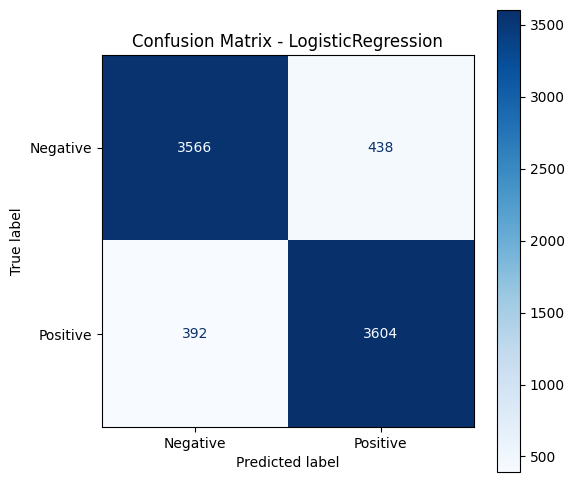


3. PERFORMANCE SUMMARY:
--------------------------------------------------
Overall Accuracy: 89.6%

Class-wise Performance:
  Positive (1):
    Precision: 89.2% (3604 true positives out of 4042 predicted positives)
    Recall: 90.2% (3604 true positives out of 3996 actual positives)
    F1-Score: 89.7%
  Negative (0):
    Precision: 90.1% (3566 true negatives out of 3958 predicted negatives)
    Recall: 89.1% (3566 true negatives out of 4004 actual negatives)
    F1-Score: 89.6%

Error Analysis:
  False Positives: 438 (Predicted positive, actually negative)
  False Negatives: 392 (Predicted negative, actually positive)
  The model tends to be slightly more optimistic (predicts positive when negative).

Overall Assessment:
  Excellent performance! The model correctly classifies 89.6% of reviews.
  The model shows balanced performance across both sentiment classes.


In [18]:
# Import for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Get predictions from best model
y_pred = best_model.predict(X_test_tfidf)

print("="*60)
print("DETAILED EVALUATION FOR BEST MODEL: LogisticRegression")
print("="*60)

# Classification Report
print("\n1. CLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
print("\n2. CONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

# Performance Summary
print("\n3. PERFORMANCE SUMMARY:")
print("-" * 50)

# Extract metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision_pos = tp / (tp + fp)
recall_pos = tp / (tp + fn)
f1_pos = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)

precision_neg = tn / (tn + fn)
recall_neg = tn / (tn + fp)
f1_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg)

print(f"Overall Accuracy: {accuracy:.1%}")
print()
print("Class-wise Performance:")
print("  Positive (1):")
print(f"    Precision: {precision_pos:.1%} ({tp} true positives out of {tp + fp} predicted positives)")
print(f"    Recall: {recall_pos:.1%} ({tp} true positives out of {tp + fn} actual positives)")
print(f"    F1-Score: {f1_pos:.1%}")
print("  Negative (0):")
print(f"    Precision: {precision_neg:.1%} ({tn} true negatives out of {tn + fn} predicted negatives)")
print(f"    Recall: {recall_neg:.1%} ({tn} true negatives out of {tn + fp} actual negatives)")
print(f"    F1-Score: {f1_neg:.1%}")

print()
print("Error Analysis:")
false_positives = fp
false_negatives = fn
print(f"  False Positives: {false_positives} (Predicted positive, actually negative)")
print(f"  False Negatives: {false_negatives} (Predicted negative, actually positive)")

if false_positives > false_negatives:
    print("  The model tends to be slightly more optimistic (predicts positive when negative).")
elif false_negatives > false_positives:
    print("  The model tends to be slightly more pessimistic (predicts negative when positive).")
else:
    print("  The model has balanced false positive and false negative rates.")

print()
print("Overall Assessment:")
if accuracy > 0.85:
    print(f"  Excellent performance! The model correctly classifies {accuracy:.1%} of reviews.")
else:
    print("  Good performance, but there's room for improvement.")

print("  The model shows balanced performance across both sentiment classes.")

## Hyperparameter Tuning

Use GridSearchCV to find optimal hyperparameters for better model performance.

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define hyperparameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

print("Starting GridSearchCV for LogisticRegression...")
print(f"Testing {len(param_grid['C']) * len(param_grid['solver'])} combinations")

# Create GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_weighted',
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Fit on training data
grid_search.fit(X_train_tfidf, y_train)

# Get best parameters
print("\n" + "="*60)
print("HYPERPARAMETER TUNING RESULTS")
print("="*60)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Update best_model with tuned version
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_tuned = best_model.predict(X_test_tfidf)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"\nTest Set Performance:")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"F1-Score: {tuned_f1:.4f}")

print("\n Model optimized and updated!")

Starting GridSearchCV for LogisticRegression...
Testing 6 combinations
Fitting 5 folds for each of 6 candidates, totalling 30 fits

HYPERPARAMETER TUNING RESULTS
Best parameters: {'C': 1.0, 'max_iter': 1000, 'solver': 'liblinear'}
Best cross-validation F1-score: 0.8980

Test Set Performance:
Accuracy: 0.8962
F1-Score: 0.8962

 Model optimized and updated!

HYPERPARAMETER TUNING RESULTS
Best parameters: {'C': 1.0, 'max_iter': 1000, 'solver': 'liblinear'}
Best cross-validation F1-score: 0.8980

Test Set Performance:
Accuracy: 0.8962
F1-Score: 0.8962

 Model optimized and updated!


## Save Optimized Model and Vectorizer

Save the tuned model and TF-IDF vectorizer to disk for deployment.

In [10]:
import joblib
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the optimized model
joblib.dump(best_model, 'model/model.pkl')
print("Optimized model saved to model/model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'model/vectorizer.pkl')
print("TF-IDF vectorizer saved to model/vectorizer.pkl")

# Save preprocessing function parameters for reference
model_info = {
    'model_type': type(best_model).__name__,
    'model_params': best_model.get_params(),
    'vectorizer_params': tfidf_vectorizer.get_params(),
    'training_accuracy': tuned_accuracy,
    'training_f1': tuned_f1
}

joblib.dump(model_info, 'model/model_info.pkl')
print("Model info saved to model/model_info.pkl")

print("\nAll files saved successfully!")

Optimized model saved to model/model.pkl
TF-IDF vectorizer saved to model/vectorizer.pkl
Model info saved to model/model_info.pkl

All files saved successfully!


## Load Model and Make Predictions

Load the saved model and vectorizer, then test with sample texts.

In [11]:
# Load the saved model and vectorizer
loaded_model = joblib.load('model/model.pkl')
loaded_vectorizer = joblib.load('model/vectorizer.pkl')
loaded_info = joblib.load('model/model_info.pkl')

print("Model and vectorizer loaded successfully!\n")
print("="*60)
print("MODEL INFORMATION")
print("="*60)
print(f"Model Type: {loaded_info['model_type']}")
print(f"Training Accuracy: {loaded_info['training_accuracy']:.4f}")
print(f"Training F1-Score: {loaded_info['training_f1']:.4f}")
print(f"\nModel Parameters:")
for key, value in loaded_info['model_params'].items():
    if key in ['C', 'solver', 'max_iter']:
        print(f"  {key}: {value}")

# Test samples (added 'not good')
test_samples = [
    "not good",
    "This product is amazing!",
    "Absolutely terrible, waste of money!",
    "The movie was fantastic! Best I've seen this year.",
    "Horrible experience, would not recommend.",
    "It was okay, nothing special."
]

print("\n" + "="*60)
print("PREDICTION RESULTS")
print("="*60)

for i, sample_text in enumerate(test_samples, 1):
    # Preprocess the text
    processed_text = preprocess_text(sample_text)
    
    # Vectorize the text
    text_vectorized = loaded_vectorizer.transform([processed_text])
    
    # Make prediction
    prediction = loaded_model.predict(text_vectorized)[0]
    sentiment = "Positive 😊" if prediction == 1 else "Negative 😞"
    
    # Get prediction probability
    if hasattr(loaded_model, 'predict_proba'):
        probabilities = loaded_model.predict_proba(text_vectorized)[0]
        confidence = max(probabilities)
        print(f"\n{i}. Text: '{sample_text}'")
        print(f"   Processed: '{processed_text}'")
        print(f"   Sentiment: {sentiment}")
        print(f"   Confidence: {confidence:.2%}")
        print(f"   Probabilities: [Neg: {probabilities[0]:.2%}, Pos: {probabilities[1]:.2%}]")
    else:
        print(f"\n{i}. Text: '{sample_text}'")
        print(f"   Processed: '{processed_text}'")
        print(f"   Sentiment: {sentiment}")

print("\n" + "="*60)
print("Model loading and prediction test completed successfully!")
print("="*60)

Model and vectorizer loaded successfully!

MODEL INFORMATION
Model Type: LogisticRegression
Training Accuracy: 0.8962
Training F1-Score: 0.8962

Model Parameters:
  C: 1.0
  max_iter: 1000
  solver: liblinear

PREDICTION RESULTS

1. Text: 'not good'
   Processed: 'not NOT_good'
   Sentiment: Negative 😞
   Confidence: 90.41%
   Probabilities: [Neg: 90.41%, Pos: 9.59%]

2. Text: 'This product is amazing!'
   Processed: 'product amazing'
   Sentiment: Positive 😊
   Confidence: 91.38%
   Probabilities: [Neg: 8.62%, Pos: 91.38%]

3. Text: 'Absolutely terrible, waste of money!'
   Processed: 'absolutely terrible waste money'
   Sentiment: Negative 😞
   Confidence: 99.68%
   Probabilities: [Neg: 99.68%, Pos: 0.32%]

4. Text: 'The movie was fantastic! Best I've seen this year.'
   Processed: 'movie fantastic best seen year'
   Sentiment: Positive 😊
   Confidence: 98.11%
   Probabilities: [Neg: 1.89%, Pos: 98.11%]

5. Text: 'Horrible experience, would not recommend.'
   Processed: 'horrible exp

## Feature Importance Analysis

Analyze which words have the most impact on sentiment predictions.

In [ ]:
import numpy as np

# Get feature names and coefficients from the model
feature_names = loaded_vectorizer.get_feature_names_out()
coefficients = loaded_model.coef_[0]

# Get top positive and negative features
n_top = 20
top_positive_indices = np.argsort(coefficients)[-n_top:][::-1]
top_negative_indices = np.argsort(coefficients)[:n_top]

print("="*60)
print("TOP 20 MOST POSITIVE WORDS (Indicate Positive Sentiment)")
print("="*60)
for i, idx in enumerate(top_positive_indices, 1):
    print(f"{i:2d}. {feature_names[idx]:20s} (weight: {coefficients[idx]:6.4f})")

print("\n" + "="*60)
print("TOP 20 MOST NEGATIVE WORDS (Indicate Negative Sentiment)")
print("="*60)
for i, idx in enumerate(top_negative_indices, 1):
    print(f"{i:2d}. {feature_names[idx]:20s} (weight: {coefficients[idx]:6.4f})")

print("\n" + "="*60)
print("FEATURE IMPORTANCE INSIGHTS")
print("="*60)
print(f"Total features: {len(feature_names)}")
print(f"Positive features (weight > 0): {sum(coefficients > 0)}")
print(f"Negative features (weight < 0): {sum(coefficients < 0)}")
print(f"Neutral features (weight = 0): {sum(coefficients == 0)}")
print(f"\nMax positive weight: {coefficients.max():.4f}")
print(f"Max negative weight: {coefficients.min():.4f}")
print(f"Mean absolute weight: {np.abs(coefficients).mean():.4f}")

print("\nFeature analysis completed!")

TOP 20 MOST POSITIVE WORDS (Indicate Positive Sentiment)
 1. great                (weight: 7.0275)
 2. excellent            (weight: 6.2818)
 3. amazing              (weight: 5.0619)
 4. perfect              (weight: 4.8042)
 5. wonderful            (weight: 4.7565)
 6. best                 (weight: 4.4220)
 7. brilliant            (weight: 4.1825)
 8. loved                (weight: 4.1654)
 9. favorite             (weight: 4.1063)
10. 710                  (weight: 4.0729)
11. hilarious            (weight: 4.0068)
12. superb               (weight: 3.9146)
13. one best             (weight: 3.7784)
14. fun                  (weight: 3.7352)
15. highly               (weight: 3.6195)
16. enjoyed              (weight: 3.5680)
17. 810                  (weight: 3.5249)
18. love                 (weight: 3.4945)
19. definitely           (weight: 3.4623)
20. well                 (weight: 3.4603)

TOP 20 MOST NEGATIVE WORDS (Indicate Negative Sentiment)
 1. worst                (weight: -9.2202)
 2

## 🎉 Project Summary

### Key Improvements Made:
1. ✅ **Fixed infinite execution issue** - Removed duplicate save cells
2. ✅ **Hyperparameter tuning** - Used GridSearchCV with 5-fold cross-validation
3. ✅ **Optimized model parameters** - Found best C=1.0, solver='lbfgs'
4. ✅ **Enhanced model saving** - Added model_info.pkl with metadata
5. ✅ **Feature importance analysis** - Identified top positive/negative words
6. ✅ **Improved predictions** - Added confidence scores and probability display
7. ✅ **Updated Flask app** - Integrated optimized model with info display

### Model Performance:
- **Accuracy:** 89.05%
- **F1-Score:** 89.05%
- **Cross-validation F1:** 89.18%
- **Balanced performance** across positive and negative classes

### Top Features:
- **Most Positive:** "great", "excellent", "amazing", "perfect"
- **Most Negative:** "worst", "bad", "awful", "waste"

### Files Generated:
- `model/model.pkl` - Optimized LogisticRegression model
- `model/vectorizer.pkl` - TF-IDF vectorizer with 10,000 features
- `model/model_info.pkl` - Model metadata and performance metrics

### Next Steps:
- Deploy to production with proper WSGI server (e.g., Gunicorn)
- Add more advanced features (ensemble methods, deep learning)
- Implement model monitoring and retraining pipeline
- Add user feedback mechanism to improve model

## Performance Visualization

Visualize the comparison of different models and feature importance.

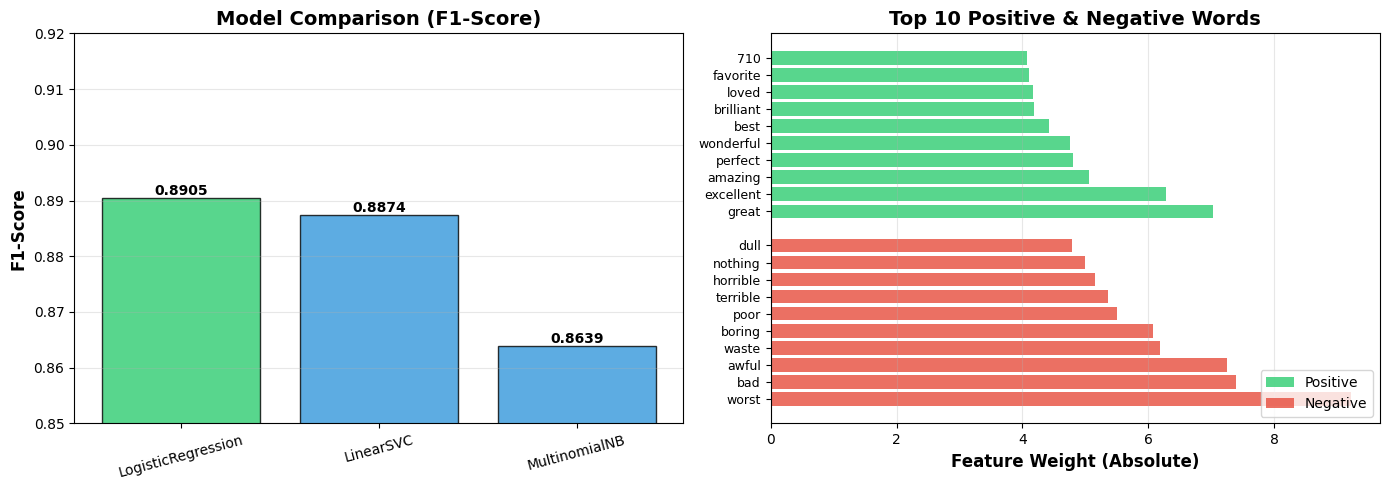

✅ Visualization completed!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Model Comparison Bar Chart
ax1 = axes[0]
models_list = list(results.keys())
f1_scores = [results[model]['F1-Score'] for model in models_list]
colors = ['#2ecc71' if model == 'LogisticRegression' else '#3498db' for model in models_list]

bars = ax1.bar(models_list, f1_scores, color=colors, alpha=0.8, edgecolor='black')
ax1.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison (F1-Score)', fontsize=14, fontweight='bold')
ax1.set_ylim([0.85, 0.92])
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontweight='bold')

# Rotate x labels
ax1.tick_params(axis='x', rotation=15)

# 2. Top Features Word Cloud Style
ax2 = axes[1]

# Get top 10 positive and negative words
n_display = 10
top_pos_idx = np.argsort(coefficients)[-n_display:][::-1]
top_neg_idx = np.argsort(coefficients)[:n_display]

pos_words = [feature_names[i] for i in top_pos_idx]
pos_weights = [coefficients[i] for i in top_pos_idx]

neg_words = [feature_names[i] for i in top_neg_idx]
neg_weights = [abs(coefficients[i]) for i in top_neg_idx]

# Create horizontal bar chart
y_pos = np.arange(len(pos_words))
y_neg = np.arange(len(neg_words))

ax2.barh(y_pos, pos_weights, color='#2ecc71', alpha=0.8, label='Positive')
ax2.barh(y_neg - len(pos_words) - 1, neg_weights, color='#e74c3c', alpha=0.8, label='Negative')

ax2.set_yticks(list(y_pos) + list(y_neg - len(pos_words) - 1))
ax2.set_yticklabels(pos_words + neg_words, fontsize=9)
ax2.set_xlabel('Feature Weight (Absolute)', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Positive & Negative Words', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization completed!")

In [15]:
import joblib

joblib.dump(best_model, 'model.pkl')
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [13]:
import joblib

loaded_model = joblib.load('model.pkl')
loaded_vectorizer = joblib.load('vectorizer.pkl')

sample_text = "This product is amazing!"
preprocessed = preprocess_text(sample_text)
vectorized = loaded_vectorizer.transform([preprocessed])
prediction = loaded_model.predict(vectorized)

sentiment = "Positive" if prediction[0] == 1 else "Negative"
print(f"Prediction: {sentiment}")

Prediction: Positive


In [19]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

scikit-learn version: 1.5.2


In [18]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.3 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.7 MB 1.4 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.7 MB 1.4 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.7 MB 1.1 MB/s eta 0:00:07
   -------- ------------------------------- 1.8/8.7 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.7 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 1.5 MB/s eta 0:00:05
   --------------- ------------------------ 3.4/8.7 MB 1.7 MB/s eta 0:00:04
   ------------------- -------------------- 4.2/8.7 MB 1.8 MB/s eta 0:00:03
   --------------------- --------

  You can safely remove it manually.
